# DATA ANALYTICS ASSIGNMENT HW3 
#### AUTHORS: 
##### POOJA DAWADA,  HANNAH HO,  JAYANT RAISINGHANI

Suppose we have a bunch of URLs and we want to know their adult-rating (i.e., is the url P, or G, or X, or R). This task is dificult for computers, but easy for humans, and this has led to the growth of crowdsourcing: get a bunch of humans to give ratings to urls, but use automated techniques to figure out how much to trust each person's ratings. We are going to use the data from a paper by Ipeirotis et al. [available here](https://github.com/ipeirotis/Get-Another-Label/tree/master/data/AdultContent2). This details an experiment run on Amazon's Mechanical Turk crowdsourcing system. They ask a bunch of raters (called "turks") to rate several urls, but they already know the answers (the true categories) for a few urls, called the "gold set". The ratings of the turks on the gold set thus allows us to judge their accuracy.

## Question 1

Read in the files gold.txt and labels.txt. The gold DataFrame should have columns url and category, while the labels DataFrame should have columns turk, url and category. You will have to pick the right separator.

In [1]:
import numpy as np
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
## Reading the gold file 
golds = pd.read_csv('C:/Users/raisi/Downloads/Summer 2019/Data Analytics Programming/HW3/test/gold.txt', 
                    sep='\t',
                    header=None,
                   names = ['url','category'])
golds

,url,category
0,http://0800-horoscope.com,G
1,http://18games.net,X
2,http://1pixelout.net,G
3,http://1porno.com/004/teens/index.html,X
4,http://1stpussy.com/005/16/index.html,X
5,http://3x-pix.com,X
6,http://4d.com,G
7,http://4neurons.com,G
8,http://4-panama-city-beach-condo.com/index.htm,G
9,http://4whw.8m.net/,X


In [3]:
## Reading the label file 
labels = pd.read_csv('C:/Users/raisi/Downloads/Summer 2019/Data Analytics Programming/HW3/labels.txt', 
                    sep='\t',
                    header=None,
                   names = ['turk','url','category'])
labels

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G
5,A2OVKTB7VNY8EW,http://000.cc,G
6,A31Z3E5SLATLML,http://000.cc,P
7,AAVCPZ8WTCFVK,http://000.cc,G
8,AHY98D5P05XIV,http://000.cc,G
9,APTFS1S88K5VC,http://000.cc,G


## QUESTION 2

Split the labels DataFrame into two: labels on gold and labels unknown, the former containing all rows where the url is present in the gold set, and the latter one contains all remaining rows of labels.

In [4]:
## Making labels_on_gold

def labelingolds(s):
    if s in list(golds['url']):
        return(True)
    else:
        return(False)
mask = labels['url'].map(labelingolds)
mask

labels_on_gold = labels[mask]
labels_unknown = labels[mask == False]

print("Labels on gold:")
print(labels_on_gold)
print("labels_unknown")
print(labels_unknown)

## Making labels_unknown for ques 9 as well to be used later 
labels_unknown9 = labels_unknown.copy()

Labels on gold:
                 turk                                                url  \
245    A1253FXHCZ9CWM                          http://0800-horoscope.com   
246    A153PKAL7OAY36                          http://0800-horoscope.com   
247    A1FV9SAPL5C6KY                          http://0800-horoscope.com   
248    A1JTOT0DWM6QGL                          http://0800-horoscope.com   
249    A1PXXEOGQ76RNJ                          http://0800-horoscope.com   
250    A21US576U8SCO4                          http://0800-horoscope.com   
251    A22C0PJUBFJTI0                          http://0800-horoscope.com   
252    A270HOAHEVIFW0                          http://0800-horoscope.com   
253    A2EG8FHODTEV63                          http://0800-horoscope.com   
254    A2LM400F4F0V0M                          http://0800-horoscope.com   
255    A2TOV7KSQSHSR2                          http://0800-horoscope.com   
256    A31OCN4MNHUQ6W                          http://0800-horoscope.com

## Question 3

Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

In [5]:
## Creating raters goodness dataframe
## Defining function to filter out correct categories 
def ratingequal(s):
    if s == True:
        return(1)
    else:
        return(0) 

## Merging labels to gold 
labels_on_gold_merge = labels_on_gold.merge(golds,
                                            left_on = 'url',
                                           right_on = 'url',
                                           suffixes = ('l','g'))

labels_on_gold_merge['correct_rating']  = labels_on_gold_merge['categoryl'] == labels_on_gold_merge['categoryg']

## labels_on_gold_merge
## Filtering out for correct ratings
labels_on_gold_merge['correct_rating'] = labels_on_gold_merge['correct_rating'].map(ratingequal)
## Grouping and calculating the number of ratings and average correctness 
labels_on_gold_merge = labels_on_gold_merge.groupby('turk')['correct_rating'].agg(['count','mean'])
## Filtering out the columns and renaming it as raters_goodness
labels_on_gold_merge.columns = ['number_of_ratings','average_correctness']
raters_goodness =  labels_on_gold_merge
raters_goodness

,number_of_ratings,average_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000
A12Y1GTGIQDGRA,3,0.333333
A13CEW9JGDWGX1,1,1.000000
A13OE9GBRJ0S2U,4,0.750000
A14IQ4GLNWNPOJ,1,1.000000
A153PKAL7OAY36,148,0.722973


## Question 4

If someone is correct p fraction of the time, the odds of success are defined as:

\begin{align*}
odds = {\frac{p}{1.001-p}}
\end{align*}

Attach a column called odds to the rater goodness DataFrame, using the average correctness of the turk as his or her p.

In [6]:
## Calculating odds 
## Defining the function that will calculate the odds and mapping it to the 'average_correctness' column
def oddsratio(s):
    k = s/(1.001 - s)
    return(k)
raters_goodness['odds'] = raters_goodness['average_correctness'].map(oddsratio)
## Making a copy to be used in question 9 later 
raters_goodness9 = raters_goodness.copy()
raters_goodness


,number_of_ratings,average_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048
A12Y1GTGIQDGRA,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1.000000,1000.000000
A153PKAL7OAY36,148,0.722973,2.600369


## Question 5

List the top 10 most accurate turks who have rated at least 20 gold set URLs.

In [7]:
## Filtering out raters having numberof ratings greater than 20 and calculating top 10 rows of it 
raters_goodness_filter = raters_goodness[raters_goodness['number_of_ratings']>=20].sort_values(by='odds', ascending=False)[:10]
raters_goodness_filter

,number_of_ratings,average_correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


## Question 6

One may imagine that a committed and accurate turk will rate lots of URLs. On the other hand, perhaps it is only the spammers who have the time to rate lots of URLs.

Is number of ratings by a turker on gold set URLs related to his or her accuracy? There's no fixed answer; just try to show some evidence for your answer.

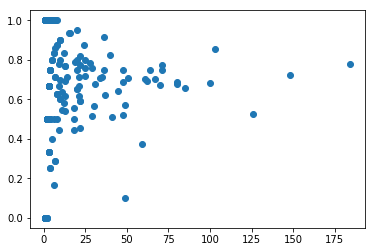

In [8]:
# to answer this question, we will plot scatter between number of ratings and accuracy to check the relation 

plot(raters_goodness['number_of_ratings'],raters_goodness['average_correctness'], linestyle='None', marker = 'o')

#### As we can see, the accuracy is somewhat improving upon increase in number of ratings 

In [9]:
#Plotting the correlation 
print(" Following is the correlation between them")
raters_goodness['number_of_ratings'].corr(raters_goodness['average_correctness'])

 Following is the correlation between them


0.04529238280484695

Looking at the value we can say that there is no significant correlation between accuracy and number of ratings as such

## Question 7

Consider each url u that is not in the gold set, and each category c. For the pair (u; c), calculate the product of odds of all turks who (a) rated url u as category c, and (b) have rated more gold set urls than 75% of all turks who
rated at least one gold-set url.

For example, if you find that there are 269 turks who rated at least one gold-set url, you want to select only the turks who have rated more gold-set urls than 75% of these 269 turks. We can think of these as our "reliable" turks. Now, our belief that url u belongs to category c depends on how many "reliable" turks rated u as c; specically, our belief is based on the product of their reliability scores (i.e., their odds). We shall call such products of odds the overall odds henceforth.

In [11]:
## calculating comparison value, i.e 75% of people who have atleast 1 rating in gold set 
## Even though we have done group by earlier and there is no chance for coming to 0, but still just doing it as a check 
## Checking if each turk has atleast 1 number_of_rating, i.e there is no one whose 'number_of_ratings' is 0
## Defining the function accordingly 
def atleastone(s):
    if s >= 1:
        return(1)
    else:
        return(0)

# Copying the data (not using copy function)
raters_goodness_comparison = raters_goodness
raters_goodness_comparison['test'] = raters_goodness_comparison['number_of_ratings'].map(atleastone)

raters_goodness_filtered7 = raters_goodness_comparison[raters_goodness_comparison['test'] == 1]
print("following is 10 example rows for gold set data ")
raters_goodness_filtered7[:10] 

following is 10 example rows for gold set data 


,number_of_ratings,average_correctness,odds,test
turk,,,,
A112DVP1KG4QZU,1,1.000000,1000.000000,1
A1253FXHCZ9CWM,29,0.517241,1.069214,1
A12CY1Q7XKJJDE,1,1.000000,1000.000000,1
A12RE8G66WTO8B,20,0.750000,2.988048,1
A12Y1GTGIQDGRA,3,0.333333,0.499251,1
A13CEW9JGDWGX1,1,1.000000,1000.000000,1
A13OE9GBRJ0S2U,4,0.750000,2.988048,1
A14IQ4GLNWNPOJ,1,1.000000,1000.000000,1
A153PKAL7OAY36,148,0.722973,2.600369,1


In [12]:
## Calculating the 75th percentile of the number of ratings
turktest = np.quantile(raters_goodness_filtered7['number_of_ratings'],0.75 )
print("following is the value of 75th percentile")
turktest

following is the value of 75th percentile


11.0

In [13]:

## creating the copy of data ( Just to keep a check so that i don't have to start again if I find a mistake )
raters_goodness_flag = raters_goodness_filtered7.copy()
## adding a column to the data for comparison 
raters_goodness_flag['NOR_quantile'] = turktest
## droping the rows with na as they don't have any value for comparison
raters_goodness_flag.dropna(inplace = True)


## Filtering out rows or turks above 75th percentile
raters_goodness_flag = raters_goodness_flag[raters_goodness_flag['number_of_ratings'] > raters_goodness_flag['NOR_quantile']]
## Creating another copy 
raters_goodness_filtered8 = raters_goodness_flag.copy()
print("following is top 10 example rows of the raters goodness table with the quantile value")
raters_goodness_filtered8[:10]





following is top 10 example rows of the raters goodness table with the quantile value


,number_of_ratings,average_correctness,odds,test,NOR_quantile
turk,,,,,
A1253FXHCZ9CWM,29,0.517241,1.069214,1,11.0
A12RE8G66WTO8B,20,0.750000,2.988048,1,11.0
A153PKAL7OAY36,148,0.722973,2.600369,1,11.0
A18HIFA78GUAG9,13,0.538462,1.164144,1,11.0
A1DCIXV1JC91MY,22,0.590909,1.440922,1,11.0
A1HIXWH4OXT8S4,40,0.825000,4.687500,1,11.0
A1IB9WML70CU89,12,0.833333,4.970179,1,11.0
A1JTOT0DWM6QGL,29,0.758621,3.129890,1,11.0
A1PXXEOGQ76RNJ,41,0.512195,1.047852,1,11.0


In [14]:
# merging this back to unknown label unknown data to get the required reliable turks 

labels_unknown_filtered = labels_unknown.merge(raters_goodness_filtered8,
                                            left_on = 'turk',
                                            right_on = 'turk',
                                            suffixes = ('l','r'))

print('turks are merged back to labels unknown creating "labels_unknown_filtered" table')

turks are merged back to labels unknown creating "labels_unknown_filtered" table


In [15]:
## calculating product of odds. Defining the function that will take the product of odds and mapping it to data 
def prododds (s):
    k = float(1)
    #print(k)
    for i in s:
        k = k*float(i)
        #r = s[i]
    return(k)

labels_unknown_filtered_grp = labels_unknown_filtered.groupby(['url','category'])[['odds']].agg(prododds)

print('following is the product of odds table containing overall odss for (u,c) pair')
labels_unknown_filtered_grp

following is the product of odds table containing overall odss for (u,c) pair


odds
url                                                category            
http://0-101.net                                   G           2.155963
http://000.cc                                      G           1.460583
http://0000.jp                                     G          14.488244
http://000relationships.com                        G           5.681060
                                                   P           1.851852
http://000vitamins.com                             G           3.784982
http://000webhost.com                              G          11.159502
http://003my.com                                   G           4.912040
http://007absolutehardcore.com/early_cumshots/i... P           3.346522
                                                   R          12.290450
                                                   X         293.252871
http://007swz.cn                                   G           1.393883
http://01768.com                                   G           1.393883
http://0198.cc                                     G           2.947446
http://01house.cn                                  G           3.874200
http://01net.com                                   G           2.463388
http://01yyy.com                                   G           3.874200
                                                   R           1.304682
http://020dna.com                                  G           5.054597
                                                   R           1.620746
http://020hp.net                                   G           2.463388
http://020shenghuo.com                             G           1.393883
http://021cd.com                                   G           3.378660
http://024haha.cn                                  G           1.460583
http://028114.com                                  G           1.854185
http://028town.com                                 G           3.626269
http://029bus.cn                                   G           1.097994
                                                   P           1.330229
http://029zp.com                                   G           1.047852
http://02et.cn                                     G           2.581266
...                                                                 ...
http://zoomerang.com                               G           6.271191
http://zoominfo.com                                G          50.648819
http://zoosk.com                                   G           1.818574
                                                   P           1.620746
http://zoower.com                                  G           6.796445
http://zooz.vn                                     G           4.350366
http://zoozle.org                                  G          33.942585
http://zorkabiz.ru                                 G           5.054597
http://zouri.jp                                    G           1.432532
http://zoznam.sk                                   G           2.652501
                                                   R           2.988048
http://zqt9.com                                    G           2.912430
http://zses.com                                    G           2.784941
http://zshare.net                                  G           2.423919
http://zshareblog.com                              G           1.097994
http://zsmhl.com                                   G           2.419121
                                                   P           1.620746
http://ztomy.com                                   G          16.420733
http://zucaiba.com                                 G           1.432532
http://zumin-ads.com                               G           2.779429
http://zune.net                                    G          20.209842
http://zvezdanews.ru                               G           5.831416
http://zwame.pt                                    G           8.623790
http://zwinky.com                  

## QUESTION 8


Create a DataFrame (called result 75, whose index is URLs not in the gold set, and with two columns called top category and top odds. The top category should be the category with the highest overall odds for that url, and the top odds should be the overall odds for that top category.

These are our predictions, and the confidence we have in them (higher overall odds implies greater confidence). If you want, you can check to see if the predicted categories make sense.

In [16]:
## Copying the result above and making a copy , reseting the index in the data 
resultsd = labels_unknown_filtered_grp.copy()
resultsd.reset_index( inplace = True)
print("by reseting the index we get url and category as columns of the table. Following is 10 example rows of the same")
resultsd[:10]



by reseting the index we get url and category as columns of the table. Following is 10 example rows of the same


,url,category,odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,5.681060
4,http://000relationships.com,P,1.851852
5,http://000vitamins.com,G,3.784982
6,http://000webhost.com,G,11.159502
7,http://003my.com,G,4.912040
8,http://007absolutehardcore.com/early_cumshots/...,P,3.346522
9,http://007absolutehardcore.com/early_cumshots/...,R,12.290450


In [17]:
## taking out the maximum number of odds in various categories in a url and creating a combination of url 
## and maximum number of odds 

## Creating intermediate result by unstacking the result of question 7 or aggregated odds to url-category dataset and then 
## Transposing it and then taking maximum
resultint2 = labels_unknown_filtered_grp.unstack().fillna(0)
resultint2['maximum'] = resultint2.T.max()
#Taking out maximum odds as a seperate entity
inter = (resultint2['maximum'])
print("following is the maximum odds per url")
inter

following is the maximum odds per url


url
http://0-101.net                                              2.155963
http://000.cc                                                 1.460583
http://0000.jp                                               14.488244
http://000relationships.com                                   5.681060
http://000vitamins.com                                        3.784982
http://000webhost.com                                        11.159502
http://003my.com                                              4.912040
http://007absolutehardcore.com/early_cumshots/index.html    293.252871
http://007swz.cn                                              1.393883
http://01768.com                                              1.393883
http://0198.cc                                                2.947446
http://01house.cn                                             3.874200
http://01net.com                                              2.463388
http://01yyy.com                                              3.874200
ht

In [18]:
## tying the maximum odds back to the dataset 
resultsdint = resultsd.merge(inter,
                            left_on = 'url',
                            right_on = 'url',
                            suffixes = ('l','r'))

## getting the category corresponding to maximum odds seperately 
resultsdint = resultsdint[resultsdint['odds'] == resultsdint['maximum']]

## Taking out the desired columns and creating result75 
resultsdint = resultsdint[['url','category','odds']]
result75 = resultsdint
print('following is the result75 table')
result75

following is the result75 table


,url,category,odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,5.681060
5,http://000vitamins.com,G,3.784982
6,http://000webhost.com,G,11.159502
7,http://003my.com,G,4.912040
10,http://007absolutehardcore.com/early_cumshots/...,X,293.252871
11,http://007swz.cn,G,1.393883
12,http://01768.com,G,1.393883


## Question 9


Questions 7 and 8 above only considered the ratings of turks who had rated enough gold set URLs, so we were relatively more confident about their accuracies. What happens if we loosen this restriction?

Repeat the code of Q7 and Q8, but replacing 75% by 25% in the description of Q7 (i.e., we also consider turks who have far fewer gold set ratings). Call this result 25.

Now let's see how these two results compare. Create a DataFrame where both the index and the columns are the various categories, and the cells contain the number of urls with these as the top categories according to result 75 and result 25.
For example, the cell corresponding to the row category=R and the column category=G would be the number of URLs that were predicted to be R by result 75 but predicted to be G by result 25. 

Where are the most errors?

In [19]:
## calculating comparison value, i.e 75% of people who have atleast 1 rating in gold set 
## Checking as we did in question 7 
def atleastone(s):
    if s >= 1:
        return(1)
    else:
        return(0)
raters_goodness_comparison = raters_goodness9
raters_goodness_comparison['test'] = raters_goodness_comparison['number_of_ratings'].map(atleastone)

raters_goodness_filtered9 = raters_goodness_comparison[raters_goodness_comparison['test'] == 1]
print('raters_goodness_filtered9 dataset is prepared')

raters_goodness_filtered9 dataset is prepared


In [20]:
# Calculating the 25th percentile in this dataset
turktest2 = np.quantile(raters_goodness_filtered9['number_of_ratings'],0.25)
print('following is the 25th percentile')
turktest2

following is the 25th percentile


1.0

In [21]:


raters_goodness_flag9 = raters_goodness_filtered9.copy()

raters_goodness_flag9['NOR_quantile'] = turktest2
raters_goodness_flag9.dropna(inplace = True)
#raters_goodness_flag = raters_goodness_flag[['number_of_ratings','NOR_quantile']]
#raters_goodness_flag.index = raters_goodness_flag['number_of_ratings']
raters_goodness_flag9 = raters_goodness_flag9[raters_goodness_flag9['number_of_ratings'] > raters_goodness_flag9['NOR_quantile']]
raters_goodness_filtered9 = raters_goodness_flag9.copy()
print('raters_goodness_filtered9 dataset filtered for turks > 25th percentiles')


raters_goodness_filtered9 dataset filtered for turks > 25th percentiles


In [22]:
## Just a self check (please ignore)

list_test = list(raters_goodness_filtered9.index)
list_test

def testing2(s):
    if s in list_test:
        return(1)
    else:
        return(0)

labels_unknown_filtered9test = labels_unknown9[labels_unknown9['turk'].map(testing2) == 1]
print("following is the length of unique turks")
len(labels_unknown_filtered9test['turk'].unique())

following is the length of unique turks


173

In [23]:
# merging this back to unknown label unknown data

labels_unknown_filtered9 = labels_unknown9.merge(raters_goodness_filtered9,
                                            left_on = 'turk',
                                            right_on = 'turk',
                                            suffixes = ('l','r'))

print("turks are merged back to labels_unknown")

turks are merged back to labels_unknown


In [24]:
## Testing for one id (please ignore)
labels_unknown_filtered9[labels_unknown_filtered9['url'] == 'http://000relationships.com']

,turk,url,category,number_of_ratings,average_correctness,odds,test,NOR_quantile
260,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852,1,1.0
261,A1PXXEOGQ76RNJ,http://000relationships.com,G,41,0.512195,1.047852,1,1.0
7524,A21US576U8SCO4,http://000relationships.com,G,49,0.571429,1.330229,1,1.0
21325,A3J86MK3VIE6ST,http://000relationships.com,G,8,0.625000,1.662234,1,1.0
23718,A3OHT85E1990AL,http://000relationships.com,G,21,0.666667,1.994018,1,1.0
26816,A4GP97LAQCCHJ,http://000relationships.com,G,12,0.583333,1.396648,1,1.0
26817,A4GP97LAQCCHJ,http://000relationships.com,G,12,0.583333,1.396648,1,1.0
29079,A19KO2JQ36WON3,http://000relationships.com,R,4,0.250000,0.332889,1,1.0
29229,A1UKUDGXMHTYAR,http://000relationships.com,G,2,1.000000,1000.000000,1,1.0
29453,A30WOL8QA55HR2,http://000relationships.com,G,8,0.625000,1.662234,1,1.0


so there are some records having odds as 0 (index 33344), so this will effect the product of odds for some urls as they will be 0

In [25]:
## calculating product of odds 
def prododds (s):
    k = float(1)
    #print(k)
    for i in s:
        k = k*float(i)
        #r = s[i]
    return(k)

## Making the product of odds table with condition >25th percentile
labels_unknown_filtered_grp9 = labels_unknown_filtered9.groupby(['url','category'])[['odds']].agg(prododds)

## Copying the dataset and reseting the index the way we did in question 8 
resultsd9 = labels_unknown_filtered_grp9.copy()
resultsd9.reset_index( inplace = True)

## filtering out the maximum odds value as done in question 8
resultint2_9 = labels_unknown_filtered_grp9.unstack().fillna(0)
resultint2_9['maximum'] = resultint2_9.T.max()
## Taking out the maximum value as a list 
inter9 = (resultint2_9['maximum'])
#inter9

## merging it back and getting the maximum value 
resultsdint9 = resultsd9.merge(inter9,
                            left_on = 'url',
                            right_on = 'url',
                            suffixes = ('l','r'))


resultsdint9 = resultsdint9[resultsdint9['odds'] == resultsdint9['maximum']]
resultsdint9 = resultsdint9[['url','category','odds']]
results25 = resultsdint9
print('following is the results25 table')
results25.sort_values('url')




following is the results25 table


,url,category,odds
0,http://0-101.net,G,2.155963e+00
1,http://000.cc,G,2.181050e+03
3,http://0000.jp,G,2.877556e+07
5,http://000relationships.com,P,1.851852e+00
7,http://000vitamins.com,G,5.014149e+00
8,http://000webhost.com,G,1.113723e+07
9,http://003my.com,G,4.912040e+00
12,http://007absolutehardcore.com/early_cumshots/...,X,5.847515e+02
13,http://007swz.cn,G,1.391101e+00
14,http://01768.com,G,1.393883e+00


In [26]:
## Grouping result75 categories (just a check)
result_75grp = result75.groupby('category')['url'].agg('count')
result_75grp

category
G    9303
P     585
R     208
X     516
Name: url, dtype: int64

In [27]:
## Grouping results25 categories (just a check)
result_25grp = results25.groupby('category')['url'].agg('count')
result_25grp

category
G    8639
P     951
R     395
X     724
Name: url, dtype: int64

In [28]:
## merging the two datasets 
result_merged = result75.merge(results25,
                                  left_on = 'url',
                                  right_on = 'url',
                                  suffixes = ('l75','r25'))
result_merged

,url,categoryl75,oddsl75,categoryr25,oddsr25
0,http://0-101.net,G,2.155963,G,2.155963e+00
1,http://000.cc,G,1.460583,G,2.181050e+03
2,http://0000.jp,G,14.488244,G,2.877556e+07
3,http://000relationships.com,G,5.681060,P,1.851852e+00
4,http://000vitamins.com,G,3.784982,G,5.014149e+00
5,http://000webhost.com,G,11.159502,G,1.113723e+07
6,http://003my.com,G,4.912040,G,4.912040e+00
7,http://007absolutehardcore.com/early_cumshots/...,X,293.252871,X,5.847515e+02
8,http://007swz.cn,G,1.393883,G,1.391101e+00
9,http://01768.com,G,1.393883,G,1.393883e+00


In [30]:
pd.crosstab(result_merged['categoryl75'],result_merged['categoryr25'])

categoryr25,G,P,R,X
categoryl75,,,,
G,8327,575,188,217
P,190,330,47,19
R,21,34,128,27
X,27,6,26,457
